In [1]:
from importlib import reload
import germibeta as G

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [49]:
F = []
with open('PF00009_D.txt') as f:
    for linea in f:
        if(len(linea)>0):
            F += [int(x) for y in linea.split(",") for x in y if x!='\n']

F = sorted(F, reverse=True)

<Axes: >

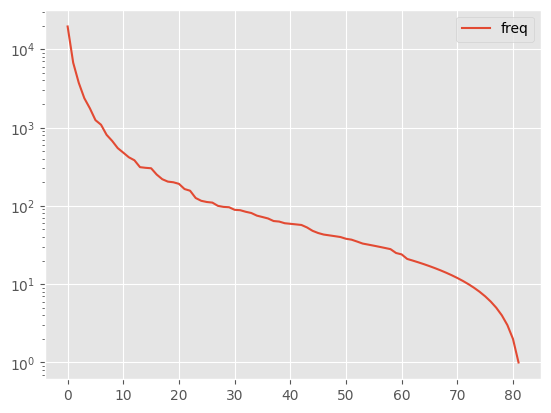

In [2]:
F = pd.read_csv('fbc_brown.csv', header=None)
F.columns = ['freq']
F.plot(logy=True,)

In [51]:
gg.ajuste(F, metodo='loglog')

C:\Users\usuario\Documents\dev\fbc\germibeta.py:159: RuntimeWarning: divide by zero encountered in log
  Y  = log(F)
C:\Users\usuario\Documents\dev\fbc\germibeta.py:175: RuntimeWarning: divide by zero encountered in log
  r2 = self.__r2_score(np.log(F), F_pred)
C:\Users\usuario\Documents\dev\fbc\germibeta.py:101: RuntimeWarning: invalid value encountered in subtract
  ss_tot = np.sum((Y - np.mean(Y))**2)


[nan, nan, nan, 28105, nan]

In [52]:
reload(G)
gg = G.Germibeta()
gg.carga_archivo('./fbc_brown.csv')
gg.ajuste(metodo='trf', verbose=True)

(82,) - (82,)
LinregressResult(slope=-1.8832582040718762, intercept=10.702344460351878, rvalue=-0.9621049587116809, pvalue=6.570158589806401e-47, stderr=0.059675316559220634, intercept_stderr=0.21266349729996298)
Punto inicial [10.70234446  1.8832582   1.8832582  82.        ]
Parámetros óptimos
[1.72677280e-02 1.86742808e-02 1.08907826e+02 6.59492668e-02]
R2 0.96540


(array([1.39790005e+00, 6.44415483e-01, 9.26902905e+02, 8.13082221e+01]),
 array([[ 2.98174431e-04, -2.37675716e-04,  1.72747607e+00,
         -4.77991573e-04],
        [-2.37675716e-04,  3.48728763e-04, -1.90719557e+00,
          8.91717022e-04],
        [ 1.72747607e+00, -1.90719557e+00,  1.18609146e+04,
         -4.57971572e+00],
        [-4.77991573e-04,  8.91717022e-04, -4.57971572e+00,
          4.34930579e-03]]),
 0.9654014929887345)

In [42]:
gg.params

array([1.39790005e+00, 6.44415483e-01, 9.26902905e+02, 8.20000000e+01,
       9.65401493e-01])

In [53]:
a, b, A, N, r2 = gg.ajuste(metodo='loglog')
a, b, A, r2

(1.3617174880825507, 0.73704234854528, 582.17255373865, 0.9964336216593583)

Graficamos

In [54]:
gg.params

[1.3617174880825507, 0.73704234854528, 582.17255373865, 82, 0.9964336216593583]

In [55]:
N= len(F)
R= np.arange(1, len(F) + 1)
F_model =G.germibeta(R, *gg.params)

C:\Users\usuario\Documents\dev\fbc\germibeta.py:189: RuntimeWarning: invalid value encountered in power
  num = power((N+1-r),beta)


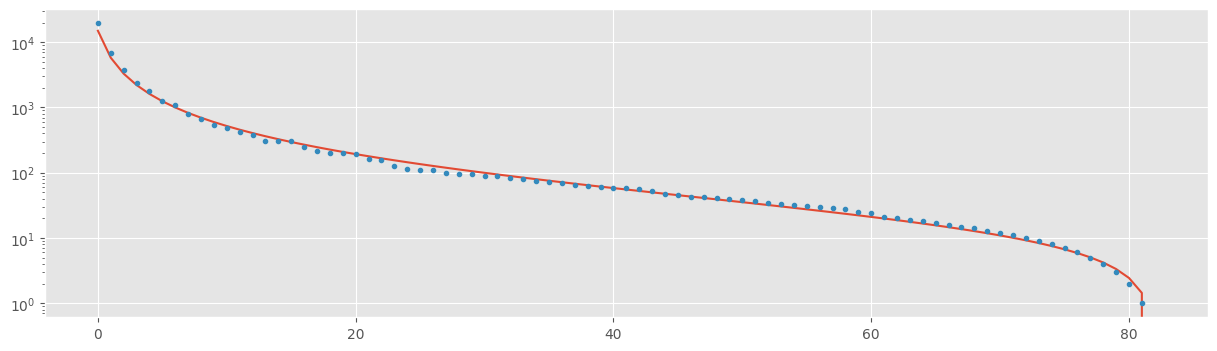

In [69]:
fig, ax = plt.subplots(1,1,figsize=(15,4))
ax.semilogy(F_model,'-')
ax.semilogy(gg.f,'.')

In [47]:
y = F.to_numpy().reshape(1,-1)[0]
len(y), N, gg.params

AttributeError: 'list' object has no attribute 'to_numpy'

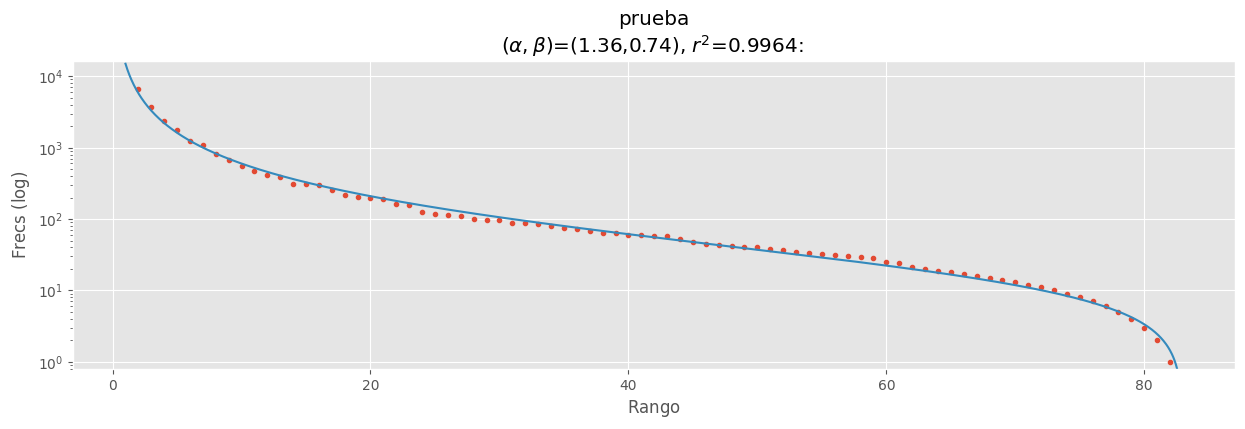

In [48]:

fig, ax = plt.subplots(1,1,figsize=(15,4))
G.graf_datos(y, gg.params, 'prueba', 'prueba', ax=ax)